### Apply the 'gettig started' Turorial to our dataset (aggregation by week)

In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('../../data/cleaned/weekseries_04_17.csv')
df.rename({'acc_nr':'y'}, axis=1, inplace=True)
len(df), df.head(), df.tail()

(731,            ds    y
 0  2004-01-04  142
 1  2004-01-11  263
 2  2004-01-18  291
 3  2004-01-25  222
 4  2004-02-01  277,              ds    y
 726  2017-12-03  278
 727  2017-12-10  262
 728  2017-12-17  240
 729  2017-12-24  257
 730  2017-12-31  176)

In [3]:
m = Prophet(yearly_seasonality=10) #daily_seasonality=True) #, weekly_seasonality=True)
m.add_country_holidays(country_name='US')
m.fit(df)
# m.train_holiday_names

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:
future = m.make_future_dataframe(periods=53,freq='W',include_history=False)
future.head(2)

,ds
0,2018-01-07
1,2018-01-14


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
48,2018-12-09,248.861093,214.469621,283.639929
49,2018-12-16,247.023920,211.506873,278.814137
50,2018-12-23,231.872756,197.777544,267.232900
51,2018-12-30,214.672990,181.604708,248.763388
52,2019-01-06,209.227915,174.911948,242.441230


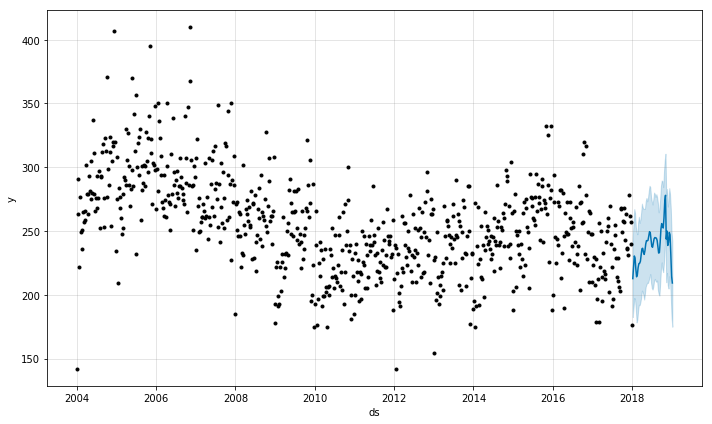

In [6]:
fig1 = m.plot(forecast)

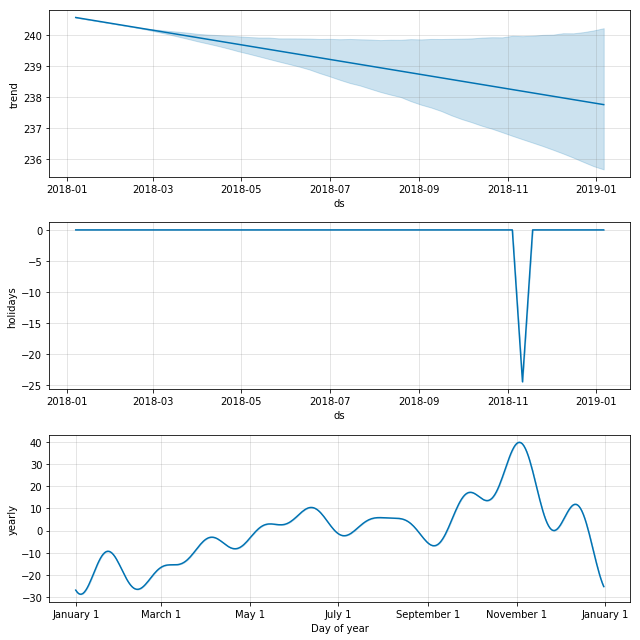

In [7]:
fig2 = m.plot_components(forecast)

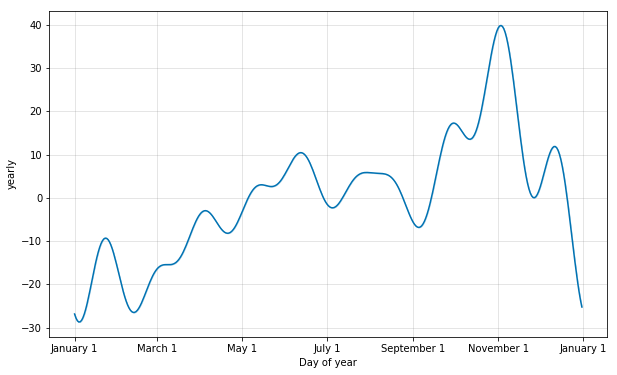

In [8]:
from fbprophet import plot as pl
a = pl.plot_yearly(m)

In [9]:
import matplotlib.pyplot as plt

In [10]:
x = forecast.index.values[:52]
y = forecast['yhat'][:52]
len(y)

52

In [11]:
df_act = pd.read_csv('../../data/cleaned/weekseries_18.csv')
yr = df_act.acc_nr.values

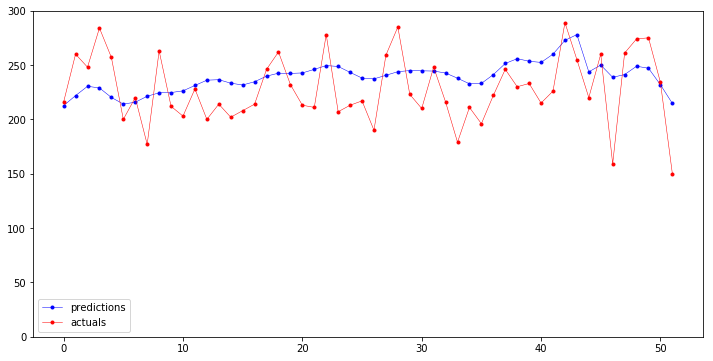

In [12]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y, 'b.-', label='predictions', lw=0.5)
ax.plot(x,yr, 'r.-', label='actuals', lw=0.5)
ax.set_ylim(0,300)
ax.legend()

In [114]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,yr)

NameError: name 'root_mean_squared_error' is not defined

In [113]:
y_base=[yr.mean()]*len(yr)
mean_squared_error(y_base,yr)

986.6253698224853

Smooth out actuals (rolling window)

In [97]:
df_act.set_index('ds', inplace=True)

In [98]:
rolling = df_act.rolling(5, center=True)

mean = rolling.mean()

ym = mean.acc_nr.values

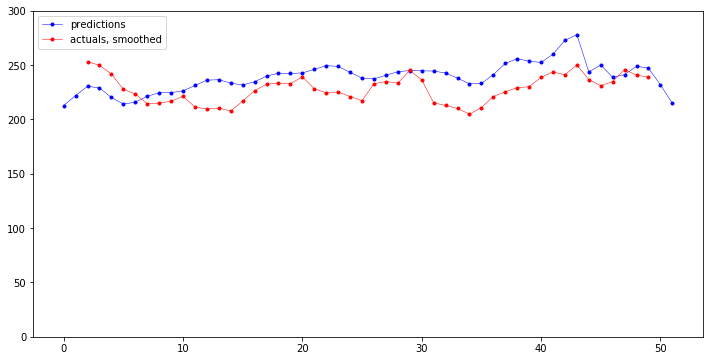

In [99]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y, 'b.-', label='predictions', lw=0.5)
ax.plot(x,ym, 'r.-', label='actuals, smoothed', lw=0.5)
ax.set_ylim(0,300)
ax.legend()

In [83]:
mean_squared_error(y[pd.notnull(ym)],ym[pd.notnull(ym)])

342.9241824867493

In [94]:
fc_ds = forecast[['ds','yhat']][:52]
fc_ds.set_index('ds', inplace=True)

In [95]:
rolling_fc = fc_ds.rolling(5, center=True)
mean_fc = rolling_fc.mean()
yfcm = mean_fc.yhat.values

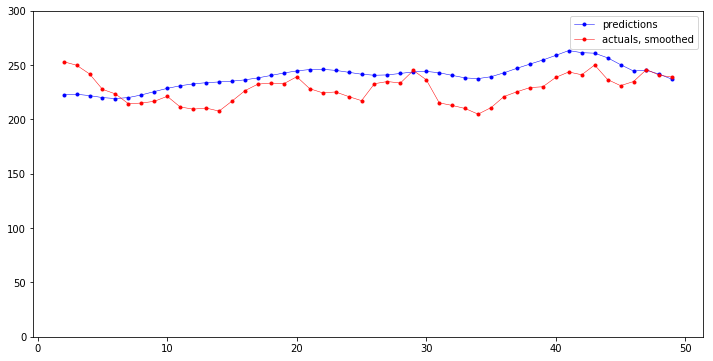

In [100]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,yfcm, 'b.-', label='predictions', lw=0.5)
ax.plot(x,ym, 'r.-', label='actuals, smoothed', lw=0.5)
ax.set_ylim(0,300)
ax.legend()

In [101]:
mean_squared_error(yfcm[pd.notnull(ym)],ym[pd.notnull(ym)])

334.5845681011313

In [103]:
ym[pd.notnull(ym)].mean()

227.9375

In [109]:
ys = [ym[pd.notnull(ym)].mean()]*len(ym[pd.notnull(ym)])

In [110]:
mean_squared_error(ys,ym[pd.notnull(ym)])

156.31692708333333